In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn import tree
import sklearn
filterwarnings('ignore')

In [19]:
df = pd.read_csv('../nb/data/drug_train.csv', header=None)
df.columns = df.iloc[0]
df = df.drop(df.index[0])

In [20]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,23,F,HIGH,HIGH,25.355,DrugY
2,47,M,LOW,HIGH,13.093,drugC
3,47,M,LOW,HIGH,10.114,drugC
4,28,F,NORMAL,HIGH,7.798,drugX
5,61,F,LOW,HIGH,18.043,DrugY


In [21]:
df.describe(include='all').transpose()

,count,unique,top,freq
0,,,,
Age,200,57,47,8
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Na_to_K,200,198,12.006,2
Drug,200,5,DrugY,91


In [22]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object', name=0)

In [23]:
df['Sex'].unique()
df.shape

(200, 6)

In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Age'] = label.fit_transform(df['Age'])
df['Sex'] = label.fit_transform(df['Sex'])
df['BP'] = label.fit_transform(df['BP'])
df['Cholesterol'] = label.fit_transform(df['Cholesterol'])

In [25]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,8,0,0,0,25.355,DrugY
2,30,1,1,0,13.093,drugC
3,30,1,1,0,10.114,drugC
4,12,0,2,0,7.798,drugX
5,44,0,1,0,18.043,DrugY


In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [29]:
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [30]:
model.score(x_test, y_test)

1.0

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [76, 17, 13, 11, 43]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [0, 17, 13, 11, 43]'),
 Text(0.25, 0.5, 'x[0] <= 33.5\ngini = 0.491\nsamples = 30\nvalue = [0, 17, 13, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 0, 11, 43]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 0, 11, 12]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 0, 31]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [76, 0, 0, 0, 0]')]

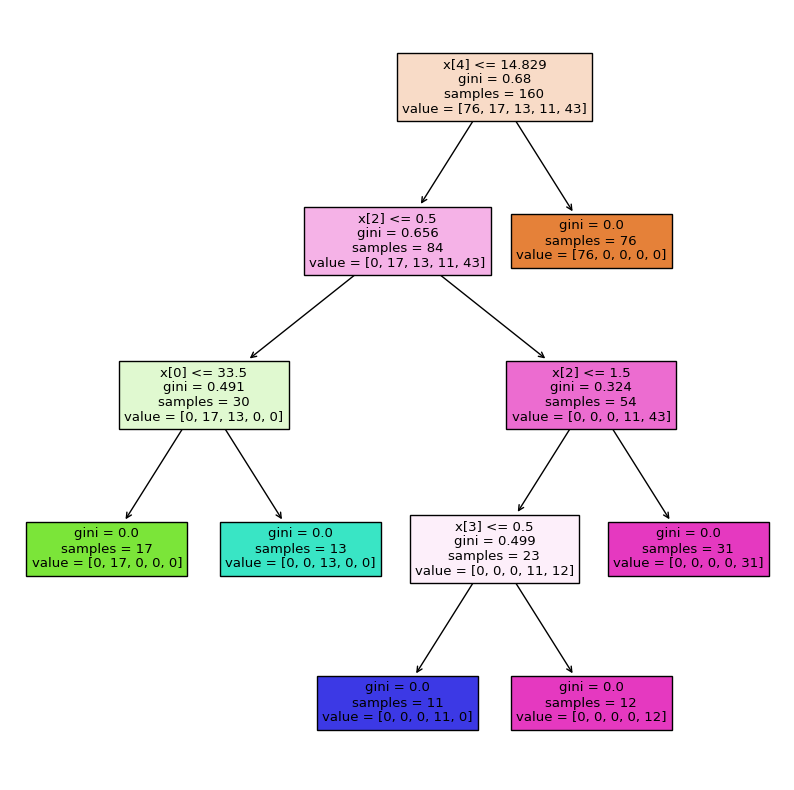

In [31]:
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True)

In [33]:
#analiza važnosti značajki
importance = model.feature_importances_
importance

array([0.13551008, 0.        , 0.2656578 , 0.1055715 , 0.49326063])